In [477]:
import pandas as pd
from sklearn.impute import KNNImputer


In [478]:
housing_index_df = pd.read_csv("../data/INDINF_REAL_ESTATE.csv",skiprows=18)
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           173 non-null    object 
 1   INDINF_NHPI_Q  123 non-null    float64
 2   INDINF_AFFORD  172 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


In [479]:
housing_index_df['date'] = pd.to_datetime(housing_index_df['date'])


In [480]:
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           173 non-null    datetime64[ns]
 1   INDINF_NHPI_Q  123 non-null    float64       
 2   INDINF_AFFORD  172 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.2 KB


In [481]:
housing_index_df["year"], housing_index_df["month"] = housing_index_df['date'].dt.year, housing_index_df['date'].dt.month

In [482]:
housing_index_df=housing_index_df.drop(columns=["date"])

In [483]:
housing_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INDINF_NHPI_Q  123 non-null    float64
 1   INDINF_AFFORD  172 non-null    float64
 2   year           173 non-null    int64  
 3   month          173 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 5.5 KB


In [484]:
housing_index_df.describe()

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
count,123.000000,172.000000,173.000000,173.000000
mean,2.689431,0.366419,2001.624277,5.508671
std,3.180391,0.070789,12.526850,3.356040
min,-3.100000,0.273000,1980.000000,1.000000
25%,0.900000,0.316750,1991.000000,4.000000
50%,2.100000,0.353000,2002.000000,7.000000
75%,4.350000,0.392750,2012.000000,7.000000
max,11.800000,0.646000,2023.000000,10.000000


In [485]:
housing_index_df.isnull().sum()

INDINF_NHPI_Q    50
INDINF_AFFORD     1
year              0
month             0
dtype: int64

In [486]:
housing_index_df

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
0,NaN,0.435,1980,7
1,NaN,0.476,1980,10
2,NaN,0.498,1981,1
3,NaN,0.552,1981,4
4,NaN,0.646,1981,7
...,...,...,...,...
168,6.9,0.507,2022,7
169,4.4,0.498,2022,10
170,1.4,0.497,2023,1
171,-0.5,0.502,2023,4


In [487]:
features_for_imputation = ['INDINF_NHPI_Q', 'INDINF_AFFORD', 'year', 'month']

complete_data = housing_index_df.dropna(subset=features_for_imputation)
incomplete_data = housing_index_df[housing_index_df[features_for_imputation].isnull().any(axis=1)]


knn_imputer_nhpi = KNNImputer(n_neighbors=3)
knn_imputer_nhpi.fit(complete_data[features_for_imputation])
imputed_values_nhpi = knn_imputer_nhpi.transform(incomplete_data[features_for_imputation])

housing_index_df.loc[incomplete_data.index, 'INDINF_NHPI_Q'] = imputed_values_nhpi[:, 0]

knn_imputer_afford = KNNImputer(n_neighbors=3)
knn_imputer_afford.fit(complete_data[features_for_imputation])
imputed_values_afford = knn_imputer_afford.transform(incomplete_data[features_for_imputation])

housing_index_df.loc[incomplete_data.index, 'INDINF_AFFORD'] = imputed_values_afford[:, 1]


In [488]:
housing_index_df

,INDINF_NHPI_Q,INDINF_AFFORD,year,month
0,1.366667,0.435000,1980,7
1,0.800000,0.476000,1980,10
2,1.166667,0.498000,1981,1
3,1.333333,0.552000,1981,4
4,1.366667,0.646000,1981,7
...,...,...,...,...
168,6.900000,0.507000,2022,7
169,4.400000,0.498000,2022,10
170,1.400000,0.497000,2023,1
171,-0.500000,0.502000,2023,4


In [489]:
housing_index_df.isnull().sum()

INDINF_NHPI_Q    0
INDINF_AFFORD    0
year             0
month            0
dtype: int64

In [490]:
import requests
import pandas as pd
from io import StringIO  
from bs4 import BeautifulSoup



api_url = f'https://www.bankofcanada.ca/rates/interest-rates/key-interest-rates/?lookupPage=lookup_key_interest.php&startRange=1935-01-01&searchDiff=&searchValue=&searchType=dates&dFrom=1981-01-01&dTo=2023-11-15&submit=Submit'

response = requests.get(api_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    #print(response.text)
   
    data_list = []
    for row in soup.find_all('tr')[1:]:
        columns = row.find_all('td')
        data_list.append([col.text.strip() for col in columns])
   
else:
    print(f"Error: {response.status_code}")


In [491]:
df = pd.DataFrame(data_list, columns=['Date', 'Bank rate', 'Change', 'Target for the overnight rate','Change'])  # Replace with actual column names


In [492]:
df


,Date,Bank rate,Change,Target for the overnight rate,Change
0,1981-01-08,17.00,-0.26,9.00,0.25
1,1981-01-15,16.97,-0.03,7.50,-0.63
2,1981-01-22,17.00,0.03,7.13,0.25
3,1981-01-29,17.11,0.11,6.94,0.13
4,1981-02-12,17.15,0.04,7.00,0.00
...,...,...,...,...,...
835,2022-12-08,4.50,0.50,,
836,2023-01-26,4.75,0.25,,
837,2023-06-08,5.00,0.25,,
838,2023-06-12,4.75,-0.25,,


In [493]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df = df.drop(columns=["Date","Change","Target for the overnight rate","Change"])


In [494]:
df.columns = map(str.lower, df.columns)

df


,bank rate,year,month
0,17.00,1981,1
1,16.97,1981,1
2,17.00,1981,1
3,17.11,1981,1
4,17.15,1981,2
...,...,...,...
835,4.50,2022,12
836,4.75,2023,1
837,5.00,2023,6
838,4.75,2023,6


In [495]:
result_df = pd.merge(df, housing_index_df, on=['year', 'month'], how='inner')

result_df

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD
0,17.00,1981,1,1.166667,0.498000
1,16.97,1981,1,1.166667,0.498000
2,17.00,1981,1,1.166667,0.498000
3,17.11,1981,1,1.166667,0.498000
4,16.74,1981,4,1.333333,0.552000
...,...,...,...,...,...
292,1.25,2022,4,8.500000,0.502000
293,2.75,2022,7,6.900000,0.507000
294,4.00,2022,10,4.400000,0.498000
295,4.75,2023,1,1.400000,0.497000


In [496]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['bank rate', 'INDINF_NHPI_Q','INDINF_AFFORD']

result_df[columns_to_scale] = scaler.fit_transform(result_df[columns_to_scale])


result_df


,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD
0,0.823353,1981,1,0.349727,0.603217
1,0.821856,1981,1,0.349727,0.603217
2,0.823353,1981,1,0.349727,0.603217
3,0.828842,1981,1,0.349727,0.603217
4,0.810379,1981,4,0.363388,0.747989
...,...,...,...,...,...
292,0.037425,2022,4,0.950820,0.613941
293,0.112275,2022,7,0.819672,0.627346
294,0.174651,2022,10,0.614754,0.603217
295,0.212076,2023,1,0.368852,0.600536


In [497]:
result_df.isnull().sum()

bank rate        0
year             0
month            0
INDINF_NHPI_Q    0
INDINF_AFFORD    0
dtype: int64

In [498]:
rows_to_skip_before = list(range(0, 11))  
rows_to_skip_after = list(range(16, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after

df_gdp = pd.read_csv("../data/GDP expenditure.csv", skiprows=rows_to_skip)
df_gdp

,Estimates,Q1 1981,Q2 1981,Q3 1981,Q4 1981,Q1 1982,Q2 1982,Q3 1982,Q4 1982,Q1 1983,...,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023
0,Final consumption expenditure,"658,323","657,303","656,993","658,411","649,659","647,902","647,861","646,843","649,730",...,"1,624,927","1,623,089","1,680,135","1,687,843","1,697,545","1,720,778","1,727,406","1,733,537","1,743,976","1,748,253"
1,Household final consumption expenditure,"430,710","430,309","428,039","429,061","422,690","419,347","417,718","416,226","422,142",...,"1,142,579","1,136,728","1,191,441","1,195,266","1,201,060","1,227,276","1,228,166","1,231,439","1,245,808","1,246,449"
2,Non-profit institutions serving households' fi...,"8,660","8,479","8,314","8,157","7,859","7,718","7,749","7,757","7,749",...,"31,672","31,752","32,400","33,052","33,348","33,828","34,072","34,216","34,984","35,652"
3,General governments final consumption expenditure,"226,086","225,644","228,400","229,023","227,096","229,417","231,372","232,030","228,008",...,"449,278","452,926","455,362","458,519","462,068","459,111","464,446","467,115","462,718","465,615"


In [499]:
melted_df = pd.melt(df_gdp, id_vars=['Estimates'], var_name='Year_Quarter', value_name='Value')
melted_df[['Quarter', 'Year']] = melted_df['Year_Quarter'].str.split(' ', expand=True)
melted_df = melted_df[['Estimates', 'Year', 'Quarter', 'Value']]
melted_df

,Estimates,Year,Quarter,Value
0,Final consumption expenditure,1981,Q1,"658,323"
1,Household final consumption expenditure,1981,Q1,"430,710"
2,Non-profit institutions serving households' fi...,1981,Q1,"8,660"
3,General governments final consumption expenditure,1981,Q1,"226,086"
4,Final consumption expenditure,1981,Q2,"657,303"
...,...,...,...,...
675,General governments final consumption expenditure,2023,Q1,"462,718"
676,Final consumption expenditure,2023,Q2,"1,748,253"
677,Household final consumption expenditure,2023,Q2,"1,246,449"
678,Non-profit institutions serving households' fi...,2023,Q2,"35,652"


In [500]:
quarter_to_months = {'Q1': [1, 2, 3], 'Q2': [4, 5, 6], 'Q3': [7, 8, 9], 'Q4': [10, 11, 12]}

melted_df['Month'] = melted_df['Quarter'].map(quarter_to_months)

df_expanded_gdp = melted_df.explode('Month')

df_expanded_gdp['Month'] = pd.to_numeric(df_expanded_gdp['Month'])

df_expanded_gdp.sort_values(['Year', 'Month'], inplace=True)

df_expanded_gdp.reset_index(drop=True, inplace=True)

df_expanded_gdp = df_expanded_gdp.drop(columns=["Quarter"])
df_expanded_gdp

,Estimates,Year,Value,Month
0,Final consumption expenditure,1981,"658,323",1
1,Household final consumption expenditure,1981,"430,710",1
2,Non-profit institutions serving households' fi...,1981,"8,660",1
3,General governments final consumption expenditure,1981,"226,086",1
4,Final consumption expenditure,1981,"658,323",2
...,...,...,...,...
2035,General governments final consumption expenditure,2023,"465,615",5
2036,Final consumption expenditure,2023,"1,748,253",6
2037,Household final consumption expenditure,2023,"1,246,449",6
2038,Non-profit institutions serving households' fi...,2023,"35,652",6


In [501]:
df_expanded_gdp.columns = map(str.lower, df_expanded_gdp.columns)

df_expanded_gdp


,estimates,year,value,month
0,Final consumption expenditure,1981,"658,323",1
1,Household final consumption expenditure,1981,"430,710",1
2,Non-profit institutions serving households' fi...,1981,"8,660",1
3,General governments final consumption expenditure,1981,"226,086",1
4,Final consumption expenditure,1981,"658,323",2
...,...,...,...,...
2035,General governments final consumption expenditure,2023,"465,615",5
2036,Final consumption expenditure,2023,"1,748,253",6
2037,Household final consumption expenditure,2023,"1,246,449",6
2038,Non-profit institutions serving households' fi...,2023,"35,652",6


In [502]:
rows_to_skip_before = list(range(0, 12))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(14, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
df_unemployment=pd.read_csv("../data/unemployment rate.csv",skiprows=rows_to_skip)

In [503]:
df_unemployment= df_unemployment.drop(columns=["Data type"])

In [504]:
df_unemployment

,Labour force characteristics,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Unemployment rate 14,7.4,7.4,7.4,7.1,7.2,7.2,7.2,7.1,8.1,...,5,5,5,5,5.2,5.4,5.5,5.5,5.5,5.7


In [505]:

df_unemployment_long = pd.melt(df_unemployment, id_vars=['Labour force characteristics'], var_name='Month_Year', value_name='Unemployment_rate')

df_unemployment_long[['Month', 'Year']] = df_unemployment_long['Month_Year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_unemployment_long['Month'] = df_unemployment_long['Month'].map(month_mapping)

df_unemployment_long = df_unemployment_long.drop(columns=['Month_Year'])

df_unemployment_long = df_unemployment_long.drop(columns=["Labour force characteristics"])
df_unemployment_long

,Unemployment_rate,Month,Year
0,7.4,1,81
1,7.4,2,81
2,7.4,3,81
3,7.1,4,81
4,7.2,5,81
...,...,...,...
509,5.4,6,23
510,5.5,7,23
511,5.5,8,23
512,5.5,9,23


In [506]:
df_unemployment_long.columns = map(str.lower, df_unemployment_long.columns)

df_unemployment_long


,unemployment_rate,month,year
0,7.4,1,81
1,7.4,2,81
2,7.4,3,81
3,7.1,4,81
4,7.2,5,81
...,...,...,...
509,5.4,6,23
510,5.5,7,23
511,5.5,8,23
512,5.5,9,23


In [507]:
df_unemployment_long['year'] = df_unemployment_long['year'].apply(lambda x: int('20' + x) if int(x) < 50 else int('19' + x))


In [508]:
df_unemployment_long

,unemployment_rate,month,year
0,7.4,1,1981
1,7.4,2,1981
2,7.4,3,1981
3,7.1,4,1981
4,7.2,5,1981
...,...,...,...
509,5.4,6,2023
510,5.5,7,2023
511,5.5,8,2023
512,5.5,9,2023


In [509]:
df_unemployment_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unemployment_rate  514 non-null    float64
 1   month              514 non-null    int64  
 2   year               514 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.2 KB


In [510]:
rows_to_skip_before = list(range(0, 10))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(12, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
pd_houshold_saving = pd.read_csv("../data/household saving rate.csv",skiprows=rows_to_skip)

In [511]:
pd_houshold_saving

,Estimates,Q1 1981,Q2 1981,Q3 1981,Q4 1981,Q1 1982,Q2 1982,Q3 1982,Q4 1982,Q1 1983,...,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023
0,Household saving rate 4,16.4,17.3,17.8,18.2,21.6,21.3,20.2,18.6,16.6,...,14,14.1,9.3,6.5,8.8,5.1,4.7,5.8,3.7,5.1


In [512]:
df_saving_long = pd.melt(pd_houshold_saving, id_vars=['Estimates'], var_name='Quarter_Year', value_name='Household_saving_rate')

df_saving_long[['Quarter', 'Year']] = df_saving_long['Quarter_Year'].str.split(' ', expand=True)

quarter_mapping = {
    'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4
}

df_saving_long['Quarter'] = df_saving_long['Quarter'].map(quarter_mapping)

df_saving_long = df_saving_long.drop(columns=['Quarter_Year','Estimates'])
df_saving_long

,Household_saving_rate,Quarter,Year
0,16.4,1,1981
1,17.3,2,1981
2,17.8,3,1981
3,18.2,4,1981
4,21.6,1,1982
...,...,...,...
165,5.1,2,2022
166,4.7,3,2022
167,5.8,4,2022
168,3.7,1,2023


In [513]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

df_saving_long['month'] = df_saving_long['Quarter'].map(quarter_to_month)

df_saving_long = df_saving_long.drop(columns=['Quarter'])
df_saving_long

,Household_saving_rate,Year,month
0,16.4,1981,1
1,17.3,1981,4
2,17.8,1981,7
3,18.2,1981,10
4,21.6,1982,1
...,...,...,...
165,5.1,2022,4
166,4.7,2022,7
167,5.8,2022,10
168,3.7,2023,1


In [514]:
df_saving_long.columns = map(str.lower, df_saving_long.columns)

df_saving_long


,household_saving_rate,year,month
0,16.4,1981,1
1,17.3,1981,4
2,17.8,1981,7
3,18.2,1981,10
4,21.6,1982,1
...,...,...,...
165,5.1,2022,4
166,4.7,2022,7
167,5.8,2022,10
168,3.7,2023,1


In [515]:
import numpy as np
df_expanded_gdp["year"]=df_expanded_gdp["year"].astype(np.int64)

In [516]:
df_saving_long["year"]=df_saving_long["year"].astype(np.int64)

In [517]:
print(result_df[['year', 'month']].dtypes)
print(df_expanded_gdp[['year', 'month']].dtypes)
print(df_unemployment_long[['year', 'month']].dtypes)
print(df_saving_long[['year', 'month']].dtypes)


year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object
year     int64
month    int64
dtype: object


In [518]:
df_unemployment_long.describe()

,unemployment_rate,month,year
count,514.000000,514.000000,514.000000
mean,8.138521,6.480545,2001.918288
std,1.845038,3.447830,12.376373
min,4.900000,1.000000,1981.000000
25%,6.900000,3.250000,1991.000000
50%,7.600000,6.000000,2002.000000
75%,9.475000,9.000000,2013.000000
max,14.100000,12.000000,2023.000000


In [519]:
rows_to_skip_before = list(range(0, 11))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(13, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
df_current_ac_surplus=pd.read_csv("../data/current_account_surplus.csv",skiprows=rows_to_skip)

In [520]:
df_current_ac_surplus

,Estimates,Q1 1981,Q2 1981,Q3 1981,Q4 1981,Q1 1982,Q2 1982,Q3 1982,Q4 1982,Q1 1983,...,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023
0,Net operating surplus 1,"42,820","43,124","40,068","36,460","31,100","34,700","35,848","36,080","42,880",...,"395,756","375,504","411,884","431,148","478,056","467,568","424,968","376,520","350,784","362,908"


In [521]:
df_surplus_long = pd.melt(df_current_ac_surplus, id_vars=['Estimates'], var_name='Quarter_Year', value_name='Net operating surplus 1')

df_surplus_long[['Quarter', 'year']] = df_surplus_long['Quarter_Year'].str.split(' ', expand=True)

quarter_mapping = {
    'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4
}

df_surplus_long['Quarter'] = df_surplus_long['Quarter'].map(quarter_mapping)

df_surplus_long = df_surplus_long.drop(columns=['Quarter_Year','Estimates'])
df_surplus_long

,Net operating surplus 1,Quarter,year
0,"42,820",1,1981
1,"43,124",2,1981
2,"40,068",3,1981
3,"36,460",4,1981
4,"31,100",1,1982
...,...,...,...
166,"467,568",3,2022
167,"424,968",4,2022
168,"376,520",1,2023
169,"350,784",2,2023


In [522]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

df_surplus_long['month'] = df_surplus_long['Quarter'].map(quarter_to_month)

df_surplus_long = df_surplus_long.drop(columns=['Quarter'])
df_surplus_long["year"] = df_surplus_long["year"].astype(int)

In [523]:
df_surplus_long["Net operating surplus 1"] = pd.to_numeric(df_surplus_long["Net operating surplus 1"].str.replace(',', ''), errors='coerce')

In [524]:
df_surplus_long

,Net operating surplus 1,year,month
0,42820,1981,1
1,43124,1981,4
2,40068,1981,7
3,36460,1981,10
4,31100,1982,1
...,...,...,...
166,467568,2022,7
167,424968,2022,10
168,376520,2023,1
169,350784,2023,4


In [525]:
df_surplus_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Net operating surplus 1  171 non-null    int64
 1   year                     171 non-null    int32
 2   month                    171 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 3.5 KB


In [526]:
rows_to_skip_before = list(range(0, 9))  # Rows 0 to 10 will be skipped
rows_to_skip_after = list(range(11, 1000000)) 
rows_to_skip = rows_to_skip_before + rows_to_skip_after
df_consumer_price_ind=pd.read_csv("../data/consumer_price_index.csv",skiprows=rows_to_skip)

In [527]:
df_consumer_price_ind

,Products and product groups 3 4,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,All-items,46.9,47.4,48,48.3,48.7,49.5,49.9,50.3,50.7,...,153.9,154.5,155.3,156.4,157,157.2,158.1,158.7,158.5,158.6


In [528]:
df_consumer_price_long = pd.melt(df_consumer_price_ind, id_vars=['Products and product groups 3 4'], var_name='Month_Year', value_name='All-items')

df_consumer_price_long[['month', 'year']] = df_consumer_price_long['Month_Year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_consumer_price_long['month'] = df_consumer_price_long['month'].map(month_mapping)

df_consumer_price_long = df_consumer_price_long.drop(columns=['Month_Year'])

df_consumer_price_long = df_consumer_price_long.drop(columns=["Products and product groups 3 4"])
df_consumer_price_long

,All-items,month,year
0,46.9,1,81
1,47.4,2,81
2,48.0,3,81
3,48.3,4,81
4,48.7,5,81
...,...,...,...
509,157.2,6,23
510,158.1,7,23
511,158.7,8,23
512,158.5,9,23


In [529]:
df_consumer_price_long.rename(columns={"All-items": "consumer price index"},inplace=True)
df_consumer_price_long['year'] = df_consumer_price_long['year'].apply(lambda x: int('20' + x) if int(x) < 50 else int('19' + x))
df_consumer_price_long

,consumer price index,month,year
0,46.9,1,1981
1,47.4,2,1981
2,48.0,3,1981
3,48.3,4,1981
4,48.7,5,1981
...,...,...,...
509,157.2,6,2023
510,158.1,7,2023
511,158.7,8,2023
512,158.5,9,2023


In [530]:
df_consumer_price_long["year"] = df_consumer_price_long["year"].astype(int)

In [531]:
merged_df1 = pd.merge(result_df, df_expanded_gdp, how='inner', on=['year', 'month'])
merged_df1


,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,estimates,value
0,0.823353,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323"
1,0.823353,1981,1,0.349727,0.603217,Household final consumption expenditure,"430,710"
2,0.823353,1981,1,0.349727,0.603217,Non-profit institutions serving households' fi...,"8,660"
3,0.823353,1981,1,0.349727,0.603217,General governments final consumption expenditure,"226,086"
4,0.821856,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323"
...,...,...,...,...,...,...,...
1179,0.174651,2022,10,0.614754,0.603217,General governments final consumption expenditure,"467,115"
1180,0.212076,2023,1,0.368852,0.600536,Final consumption expenditure,"1,743,976"
1181,0.212076,2023,1,0.368852,0.600536,Household final consumption expenditure,"1,245,808"
1182,0.212076,2023,1,0.368852,0.600536,Non-profit institutions serving households' fi...,"34,984"


In [532]:
merged_df1.isnull().sum()

bank rate        0
year             0
month            0
INDINF_NHPI_Q    0
INDINF_AFFORD    0
estimates        0
value            0
dtype: int64

In [533]:
merged_df2 = pd.merge(merged_df1, df_unemployment_long, how='inner', on=['year', 'month'])
merged_df2

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,estimates,value,unemployment_rate
0,0.823353,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323",7.4
1,0.823353,1981,1,0.349727,0.603217,Household final consumption expenditure,"430,710",7.4
2,0.823353,1981,1,0.349727,0.603217,Non-profit institutions serving households' fi...,"8,660",7.4
3,0.823353,1981,1,0.349727,0.603217,General governments final consumption expenditure,"226,086",7.4
4,0.821856,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323",7.4
...,...,...,...,...,...,...,...,...
1179,0.174651,2022,10,0.614754,0.603217,General governments final consumption expenditure,"467,115",5.2
1180,0.212076,2023,1,0.368852,0.600536,Final consumption expenditure,"1,743,976",5.0
1181,0.212076,2023,1,0.368852,0.600536,Household final consumption expenditure,"1,245,808",5.0
1182,0.212076,2023,1,0.368852,0.600536,Non-profit institutions serving households' fi...,"34,984",5.0


In [534]:
merged_df2.isnull().sum()

bank rate            0
year                 0
month                0
INDINF_NHPI_Q        0
INDINF_AFFORD        0
estimates            0
value                0
unemployment_rate    0
dtype: int64

In [535]:
final_merged_df = pd.merge(merged_df2, df_saving_long, how='inner', on=['year', 'month'])


In [536]:
final_merged_df

,bank rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,estimates,value,unemployment_rate,household_saving_rate
0,0.823353,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323",7.4,16.4
1,0.823353,1981,1,0.349727,0.603217,Household final consumption expenditure,"430,710",7.4,16.4
2,0.823353,1981,1,0.349727,0.603217,Non-profit institutions serving households' fi...,"8,660",7.4,16.4
3,0.823353,1981,1,0.349727,0.603217,General governments final consumption expenditure,"226,086",7.4,16.4
4,0.821856,1981,1,0.349727,0.603217,Final consumption expenditure,"658,323",7.4,16.4
...,...,...,...,...,...,...,...,...,...
1179,0.174651,2022,10,0.614754,0.603217,General governments final consumption expenditure,"467,115",5.2,5.8
1180,0.212076,2023,1,0.368852,0.600536,Final consumption expenditure,"1,743,976",5.0,3.7
1181,0.212076,2023,1,0.368852,0.600536,Household final consumption expenditure,"1,245,808",5.0,3.7
1182,0.212076,2023,1,0.368852,0.600536,Non-profit institutions serving households' fi...,"34,984",5.0,3.7


In [537]:
final_merged_df.isnull().sum()

bank rate                0
year                     0
month                    0
INDINF_NHPI_Q            0
INDINF_AFFORD            0
estimates                0
value                    0
unemployment_rate        0
household_saving_rate    0
dtype: int64

In [538]:
final_merged_df_no_duplicates = final_merged_df.drop_duplicates(
    subset=['bank rate', 'year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 'unemployment_rate','household_saving_rate','estimates', 'value'])

dfs_by_estimate = {}
for estimate, group_df in final_merged_df_no_duplicates.groupby('estimates'):
    dfs_by_estimate[estimate] = group_df[['bank rate','unemployment_rate','household_saving_rate','year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD',  'value']].rename(columns={'value': estimate})

merged_df = dfs_by_estimate['Final consumption expenditure']  # Initialize with the first DataFrame
for estimate, df in dfs_by_estimate.items():
    if estimate != 'Final consumption expenditure':
        merged_df = pd.merge(merged_df, df, on=['bank rate', 'year', 'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD','unemployment_rate','household_saving_rate'], how='outer')



In [539]:
merged_df.isnull().sum()

bank rate                                                                    0
unemployment_rate                                                            0
household_saving_rate                                                        0
year                                                                         0
month                                                                        0
INDINF_NHPI_Q                                                                0
INDINF_AFFORD                                                                0
Final consumption expenditure                                                0
General governments final consumption expenditure                            0
Household final consumption expenditure                                      0
Non-profit institutions serving households' final consumption expenditure    0
dtype: int64

In [540]:
merged_df["Final consumption expenditure"] = merged_df["Final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["General governments final consumption expenditure"] = merged_df["General governments final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Household final consumption expenditure"] = merged_df["Household final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Non-profit institutions serving households' final consumption expenditure"] = merged_df["Non-profit institutions serving households' final consumption expenditure"].str.replace(',', '').astype(float)
merged_df["Final consumption expenditure"] = merged_df["Final consumption expenditure"].astype(float)
merged_df["General governments final consumption expenditure"] = merged_df["General governments final consumption expenditure"].astype(float)
merged_df["Household final consumption expenditure"] = merged_df["Household final consumption expenditure"].astype(float)
merged_df["Non-profit institutions serving households' final consumption expenditure"] = merged_df["Non-profit institutions serving households' final consumption expenditure"].astype(float)

In [541]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   bank rate                                                                  287 non-null    float64
 1   unemployment_rate                                                          287 non-null    float64
 2   household_saving_rate                                                      287 non-null    float64
 3   year                                                                       287 non-null    int64  
 4   month                                                                      287 non-null    int64  
 5   INDINF_NHPI_Q                                                              287 non-null    float64
 6   INDINF_AFFORD                                             

In [542]:
df_consumer_price_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumer price index  514 non-null    float64
 1   month                 514 non-null    int64  
 2   year                  514 non-null    int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 10.2 KB


In [543]:
merged_df_consumer = pd.merge(merged_df, df_consumer_price_long, how='inner', on=['year', 'month'])


In [544]:
merged_df_surplus = pd.merge(merged_df_consumer, df_surplus_long, how='inner', on=['year', 'month'])

In [545]:
merged_df_surplus

,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1
0,0.823353,7.4,16.4,1981,1,0.349727,0.603217,658323.0,226086.0,430710.0,8660.0,46.9,42820
1,0.821856,7.4,16.4,1981,1,0.349727,0.603217,658323.0,226086.0,430710.0,8660.0,46.9,42820
2,0.828842,7.4,16.4,1981,1,0.349727,0.603217,658323.0,226086.0,430710.0,8660.0,46.9,42820
3,0.810379,7.1,17.3,1981,4,0.363388,0.747989,657303.0,225644.0,430309.0,8479.0,48.3,43124
4,0.820359,7.1,17.3,1981,4,0.363388,0.747989,657303.0,225644.0,430309.0,8479.0,48.3,43124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.074850,5.7,1.1,2018,10,0.254098,0.260054,1623998.0,421250.0,1172238.0,30844.0,134.1,270080
283,0.037425,5.3,5.1,2022,4,0.950820,0.613941,1720778.0,459111.0,1227276.0,33828.0,149.8,478056
284,0.112275,4.9,4.7,2022,7,0.819672,0.627346,1727406.0,464446.0,1228166.0,34072.0,153.1,467568
285,0.174651,5.2,5.8,2022,10,0.614754,0.603217,1733537.0,467115.0,1231439.0,34216.0,153.8,424968


In [546]:

scaler = MinMaxScaler()

columns_to_scale = ['Final consumption expenditure','unemployment_rate','household_saving_rate','General governments final consumption expenditure','Household final consumption expenditure','Non-profit institutions serving households\' final consumption expenditure','consumer price index','Net operating surplus 1']

merged_df_surplus[columns_to_scale] = scaler.fit_transform(merged_df_surplus[columns_to_scale])

In [547]:
processed_df = merged_df_surplus.copy()

In [548]:
processed_df.describe()

,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.421462,0.564242,0.568281,1990.829268,5.390244,0.340740,0.354934,0.174885,0.196207,0.174358,0.154337,0.282741,0.122105
std,0.203572,0.218294,0.209818,8.275128,3.381507,0.124893,0.212597,0.186183,0.172222,0.187972,0.200496,0.180591,0.147179
min,0.000000,0.000000,0.000000,1981.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.281687,0.375000,0.465438,1985.000000,1.000000,0.319672,0.211796,0.065267,0.089046,0.068531,0.030013,0.153271,0.050869
50%,0.409182,0.587500,0.571429,1990.000000,4.000000,0.349727,0.310992,0.155026,0.191228,0.152282,0.091079,0.278505,0.082558
75%,0.530938,0.737500,0.686636,1994.000000,7.000000,0.363388,0.471850,0.196056,0.243669,0.189688,0.164638,0.362617,0.111429
max,1.000000,1.000000,1.000000,2023.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


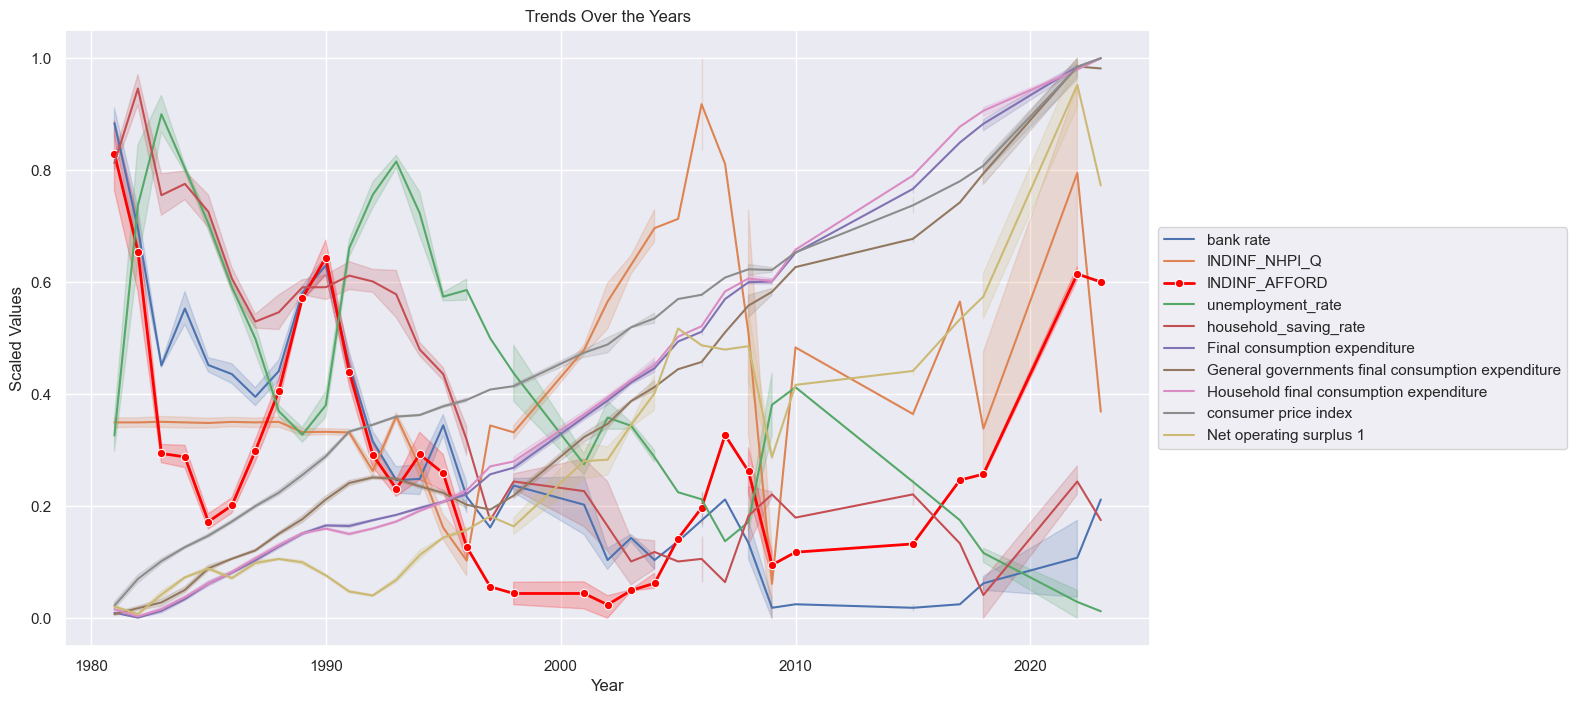

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))

features_to_plot = ['bank rate', 'INDINF_NHPI_Q', 'INDINF_AFFORD', 
                    'unemployment_rate', 'household_saving_rate', 
                    'Final consumption expenditure', 
                    'General governments final consumption expenditure', 
                    'Household final consumption expenditure',
                   'consumer price index',
                   'Net operating surplus 1']

for feature in features_to_plot:
    if feature == 'INDINF_AFFORD':
        sns.lineplot(x='year', y=feature, data=processed_df, label=feature, marker='o', color='red', linewidth=2)
    else:
        sns.lineplot(x='year', y=feature, data=processed_df, label=feature)

plt.title('Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Scaled Values')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [552]:
correlation_matrix = processed_df[['bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
       'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD',
       'Final consumption expenditure',
       'General governments final consumption expenditure',
       'Household final consumption expenditure',
       'Non-profit institutions serving households\' final consumption expenditure',
       'consumer price index', 'Net operating surplus 1' ]].corr()

correlation_matrix


,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1
bank rate,1.000000,0.004002,0.795167,-0.774590,-0.000632,-0.113287,0.801732,-0.687849,-0.700079,-0.680564,-0.664431,-0.789399,-0.588410
unemployment_rate,0.004002,1.000000,0.492774,-0.463777,0.036496,-0.367721,-0.288901,-0.547558,-0.472619,-0.562200,-0.518532,-0.401215,-0.592369
household_saving_rate,0.795167,0.492774,1.000000,-0.864582,-0.022767,-0.226213,0.519595,-0.811232,-0.776318,-0.813383,-0.793082,-0.848941,-0.746479
year,-0.774590,-0.463777,-0.864582,1.000000,-0.020352,0.280976,-0.363410,0.979234,0.972144,0.975094,0.957613,0.988018,0.882052
month,-0.000632,0.036496,-0.022767,-0.020352,1.000000,-0.093890,-0.006881,0.008359,0.006553,0.008502,0.013126,0.016055,0.009944
INDINF_NHPI_Q,-0.113287,-0.367721,-0.226213,0.280976,-0.093890,1.000000,0.025994,0.362654,0.322609,0.368761,0.404344,0.239974,0.531064
INDINF_AFFORD,0.801732,-0.288901,0.519595,-0.363410,-0.006881,0.025994,1.000000,-0.261636,-0.250757,-0.261254,-0.269304,-0.368400,-0.234119
Final consumption expenditure,-0.687849,-0.547558,-0.811232,0.979234,0.008359,0.362654,-0.261636,1.000000,0.982300,0.999119,0.970291,0.954686,0.929089
General governments final consumption expenditure,-0.700079,-0.472619,-0.776318,0.972144,0.006553,0.322609,-0.250757,0.982300,1.000000,0.973831,0.936370,0.972948,0.878693
Household final consumption expenditure,-0.680564,-0.562200,-0.813383,0.975094,0.008502,0.368761,-0.261254,0.999119,0.973831,1.000000,0.970882,0.945166,0.935889


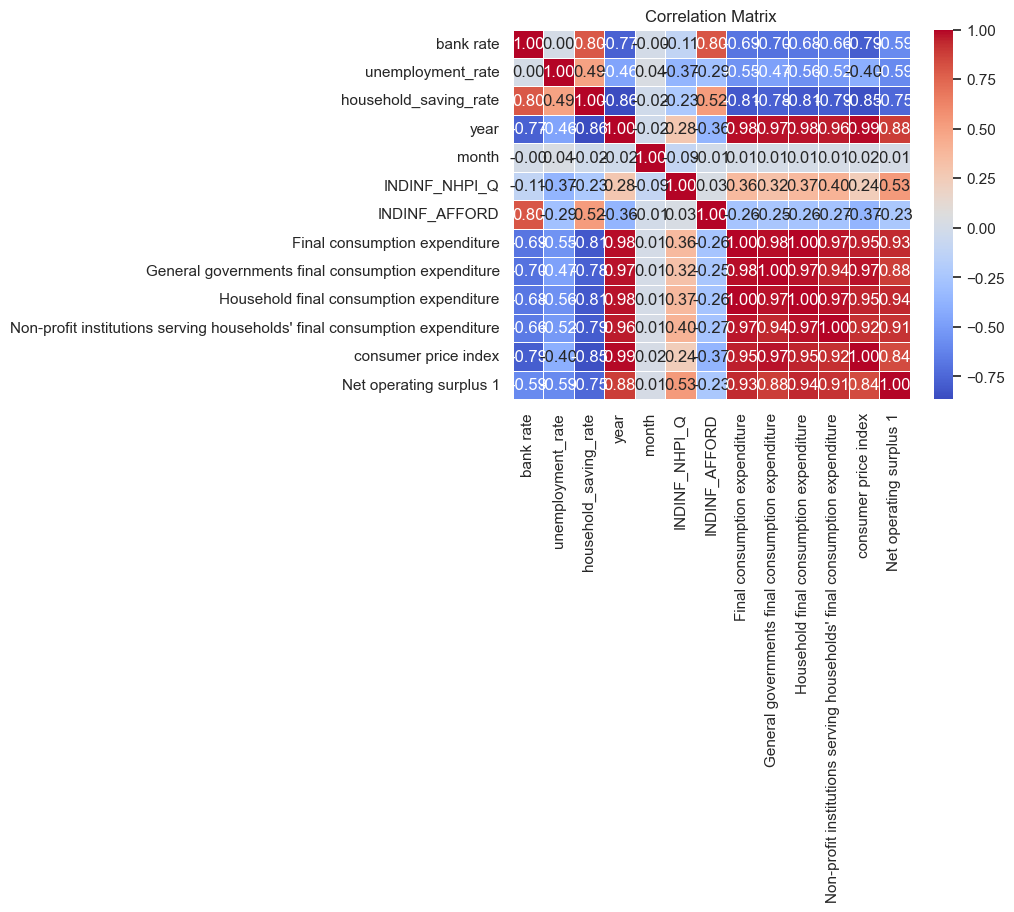

In [553]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')

plt.show()

In [554]:
from sklearn.ensemble import RandomForestRegressor

features = ['bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
       'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD',
       'Final consumption expenditure',
       'General governments final consumption expenditure',
       'Household final consumption expenditure',
       'Non-profit institutions serving households\' final consumption expenditure',
       'consumer price index', 'Net operating surplus 1']
target = 'INDINF_AFFORD'

X = processed_df[features]
y = processed_df[target]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
6,INDINF_AFFORD,0.984723
0,bank rate,0.006434
4,month,0.005640
11,consumer price index,0.000719
5,INDINF_NHPI_Q,0.000426
12,Net operating surplus 1,0.000352
10,Non-profit institutions serving households' fi...,0.000327
8,General governments final consumption expenditure,0.000305
9,Household final consumption expenditure,0.000299
2,household_saving_rate,0.000268


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

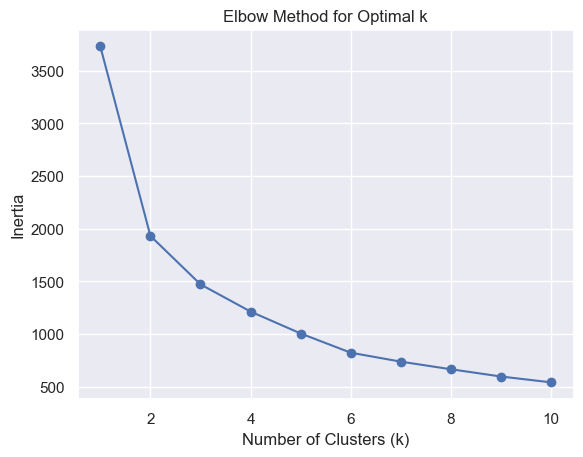

In [555]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_for_clustering = ['bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
       'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD',
       'Final consumption expenditure',
       'General governments final consumption expenditure',
       'Household final consumption expenditure',
       'Non-profit institutions serving households\' final consumption expenditure',
       'consumer price index', 'Net operating surplus 1']

scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(processed_df[features_for_clustering])

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [556]:
data_for_clustering[0]

array([ 1.97764316, -1.15524158,  0.91709172, -1.1898834 , -1.30057765,
        0.07208261,  1.16990252, -0.88466264, -1.13060886, -0.83614911,
       -0.49650221, -1.56837763, -0.65260592])

In [557]:
processed_df

,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,INDINF_AFFORD,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1
0,0.823353,0.3125,0.760369,1981,1,0.349727,0.603217,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222
1,0.821856,0.3125,0.760369,1981,1,0.349727,0.603217,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222
2,0.828842,0.3125,0.760369,1981,1,0.349727,0.603217,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222
3,0.810379,0.2750,0.801843,1981,4,0.363388,0.747989,0.009534,0.000000,0.016976,0.048465,0.013084,0.026902
4,0.820359,0.2750,0.801843,1981,4,0.363388,0.747989,0.009534,0.000000,0.016976,0.048465,0.013084,0.026902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.074850,0.1000,0.055300,2018,10,0.254098,0.260054,0.890644,0.810060,0.911317,0.851373,0.814953,0.534684
283,0.037425,0.0500,0.239631,2022,4,0.950820,0.613941,0.978856,0.966853,0.977661,0.958499,0.961682,1.000000
284,0.112275,0.0000,0.221198,2022,7,0.819672,0.627346,0.984897,0.988947,0.978734,0.967259,0.992523,0.976535
285,0.174651,0.0375,0.271889,2022,10,0.614754,0.603217,0.990485,1.000000,0.982679,0.972429,0.999065,0.881223


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


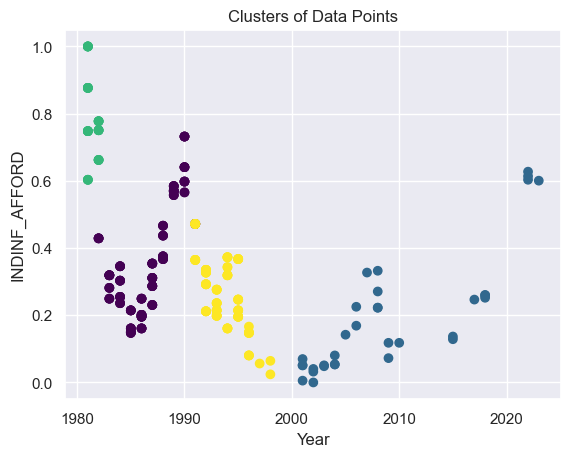

In [558]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
processed_df['Cluster_Labels'] = kmeans.fit_predict(data_for_clustering)

plt.scatter(processed_df['year'], processed_df['INDINF_AFFORD'], c=processed_df['Cluster_Labels'], cmap='viridis')
plt.title('Clusters of Data Points')
plt.xlabel('Year')
plt.ylabel('INDINF_AFFORD')
plt.show()


In [559]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_for_clustering)


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [560]:
processed_df.columns

Index(['bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
       'month', 'INDINF_NHPI_Q', 'INDINF_AFFORD',
       'Final consumption expenditure',
       'General governments final consumption expenditure',
       'Household final consumption expenditure',
       'Non-profit institutions serving households' final consumption expenditure',
       'consumer price index', 'Net operating surplus 1', 'Cluster_Labels'],
      dtype='object')

In [561]:
new_order = ['INDINF_AFFORD', 'bank rate', 'unemployment_rate', 'household_saving_rate', 'year',
             'month', 'INDINF_NHPI_Q', 
             'Final consumption expenditure', 'General governments final consumption expenditure',
             'Household final consumption expenditure',
             'Non-profit institutions serving households\' final consumption expenditure', 'consumer price index', 'Net operating surplus 1','Cluster_Labels']

processed_df = processed_df[new_order]
processed_df

,INDINF_AFFORD,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1,Cluster_Labels
0,0.603217,0.823353,0.3125,0.760369,1981,1,0.349727,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222,2
1,0.603217,0.821856,0.3125,0.760369,1981,1,0.349727,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222,2
2,0.603217,0.828842,0.3125,0.760369,1981,1,0.349727,0.010464,0.001830,0.017459,0.054963,0.000000,0.026222,2
3,0.747989,0.810379,0.2750,0.801843,1981,4,0.363388,0.009534,0.000000,0.016976,0.048465,0.013084,0.026902,2
4,0.747989,0.820359,0.2750,0.801843,1981,4,0.363388,0.009534,0.000000,0.016976,0.048465,0.013084,0.026902,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.260054,0.074850,0.1000,0.055300,2018,10,0.254098,0.890644,0.810060,0.911317,0.851373,0.814953,0.534684,1
283,0.613941,0.037425,0.0500,0.239631,2022,4,0.950820,0.978856,0.966853,0.977661,0.958499,0.961682,1.000000,1
284,0.627346,0.112275,0.0000,0.221198,2022,7,0.819672,0.984897,0.988947,0.978734,0.967259,0.992523,0.976535,1
285,0.603217,0.174651,0.0375,0.271889,2022,10,0.614754,0.990485,1.000000,0.982679,0.972429,0.999065,0.881223,1


In [562]:
cluster_centers = kmeans.cluster_centers_
feature_names = processed_df.columns
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} Characteristics:")
    for feature, value in zip(feature_names, center):
        print(f"   {feature}: {value}")


Cluster 1 Characteristics:
   INDINF_AFFORD: 0.3414369222041017
   bank rate: 0.09847323066872436
   unemployment_rate: 0.3660512629455642
   household_saving_rate: -0.5213289051152538
   year: -0.028080653735292015
   month: 0.03738394311664275
   INDINF_NHPI_Q: 0.004640358439760457
   Final consumption expenditure: -0.44726380524520853
   General governments final consumption expenditure: -0.45531186427958853
   Household final consumption expenditure: -0.43701853939329866
   Non-profit institutions serving households' final consumption expenditure: -0.5631025594756401
   consumer price index: -0.506804653612466
   Net operating surplus 1: -0.29022949976554835
Cluster 2 Characteristics:
   INDINF_AFFORD: -1.506575588394616
   bank rate: -1.548086704413768
   unemployment_rate: -1.9464518367898602
   household_saving_rate: 2.218002069388152
   year: -0.03481344205778889
   month: 1.649958623723073
   INDINF_NHPI_Q: -0.7464254637156109
   Final consumption expenditure: 2.3384014587868


In [571]:
new_data_point= pd.DataFrame({
    'INDINF_AFFORD': [0.3],
    'bank rate': [-0.4],
    'unemployment_rate': [0.5],
    'household_saving_rate': [-0.2],
    'year': [0.9],
    'month': [0.2],
    'INDINF_NHPI_Q': [0.4],
    'Final consumption expenditure': [-0.1],
    'General governments final consumption expenditure': [0.6],
    'Household final consumption expenditure': [-0.3],
    'Non-profit institutions serving households\' final consumption expenditure': [0.8],
    'consumer price index': [-0.7],
    'Net operating surplus 1': [0.1]
})

new_data_point_label = kmeans.predict(new_data_point)

new_data_point['Cluster_Label'] = new_data_point_label +1


E:\Conestoga\Foundation of ML\housing\venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [572]:
new_data_point

,INDINF_AFFORD,bank rate,unemployment_rate,household_saving_rate,year,month,INDINF_NHPI_Q,Final consumption expenditure,General governments final consumption expenditure,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,consumer price index,Net operating surplus 1,Cluster_Label
0,0.3,-0.4,0.5,-0.2,0.9,0.2,0.4,-0.1,0.6,-0.3,0.8,-0.7,0.1,1
